# Music Throughout the Decade: Exploratory Data Analysis
### Looking at Spotify data of the most popular songs from 2010-2019

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
top_songs = pd.read_excel("top10s.xlsx") 
#downloaded from kaggle: https://www.kaggle.com/leonardopena/top-spotify-songs-from-20102019-by-year

In [3]:
#removing the unnamed column
top_songs = top_songs.drop('Unnamed: 0', axis=1)
top_songs

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,104,66,61,-7,20,16,176,1,3,75
599,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,-6,7,61,206,21,12,75
600,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,136,76,53,-5,9,65,260,7,34,70
601,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,2019,114,79,60,-6,42,24,217,1,7,69


In [4]:
#renaming some columns
top_songs.rename(columns = {'top genre': 'genre', 'bpm': 'beats_per_minute', 'nrgy': 'energy', 
                       'dnce': 'danceability', 'dB': 'loudness(dB)', 'live': 'liveness', 
                       'val': 'valence', 'dur': 'length(s)', 'acous': 'acousticness', 
                       'spch': 'speechiness', 'pop': 'popularity'}, inplace=True)

In [5]:
top_songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 14 columns):
title               603 non-null object
artist              603 non-null object
genre               603 non-null object
year                603 non-null int64
beats_per_minute    603 non-null int64
energy              603 non-null int64
danceability        603 non-null int64
loudness(dB)        603 non-null int64
liveness            603 non-null int64
valence             603 non-null int64
length(s)           603 non-null int64
acousticness        603 non-null int64
speechiness         603 non-null int64
popularity          603 non-null int64
dtypes: int64(11), object(3)
memory usage: 66.1+ KB


In [6]:
avg_length = round(top_songs['length(s)'].mean())
display(Markdown('### This decade, the top songs were, on average, {} minutes and {} seconds long'.format(avg_length//60,
                                                                                                           avg_length%60)))

### This decade, the top songs were, on average, 3 minutes and 45 seconds long

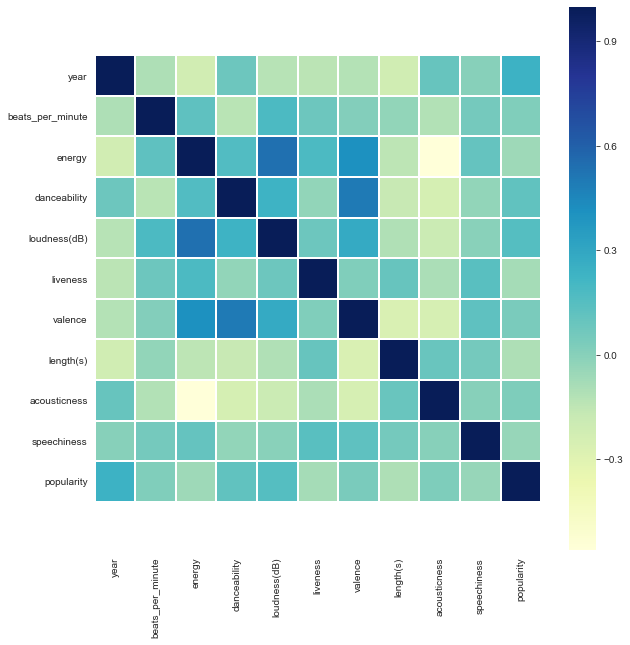

In [7]:
#Relationships between numerical values
plt.figure(figsize = (10, 10))
corr = top_songs.corr()
sns.heatmap(corr, cmap = 'YlGnBu', linecolor = 'white', linewidth = 1)
plt.axis('equal')
plt.show()

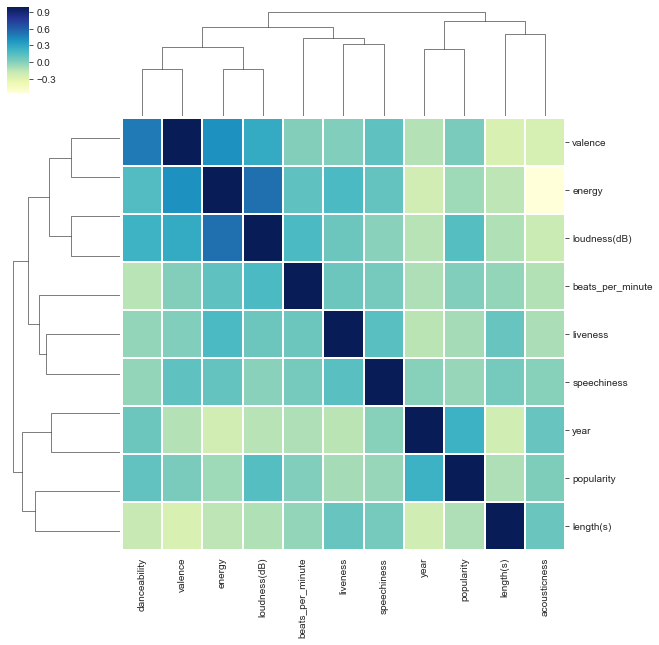

In [8]:
cl = sns.clustermap(corr, cmap = 'YlGnBu', linecolor = 'white', linewidth = 1)
b, t = cl.ax_heatmap.get_ylim()
cl = cl.ax_heatmap.set_ylim(b - 0.5, t + 0.5)

### Danceability, valence, energy, and loudness(dB) appear to be more closely related, also year and popularity

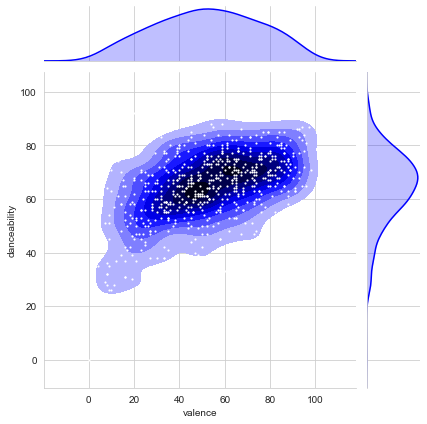

In [9]:
g = sns.jointplot(x='valence', y='danceability', data=top_songs, kind="kde", color='blue')
g.plot_joint(plt.scatter, c="w", s=5, linewidth=1, marker=".")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels('valence', 'danceability');

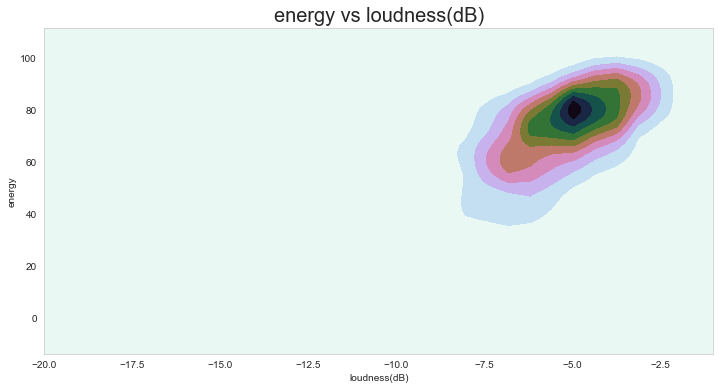

In [12]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.title('energy vs loudness(dB)', fontsize = 20)
sns.kdeplot(top_songs['loudness(dB)'], top_songs['energy'], cmap = 'cubehelix_r', shade = True)
ax = ax.set_xlim(-20, -1)

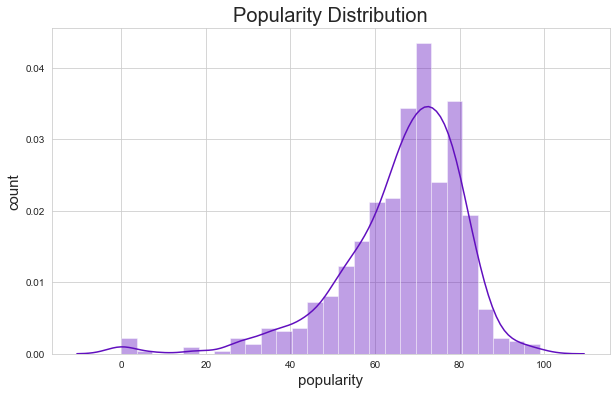

In [11]:
plt.figure(figsize=(10,6))
plt.title('Popularity Distribution',fontsize=20)
plt.xlabel('popularity', fontsize=15)
plt.ylabel('count', fontsize=15)

sns.distplot(top_songs['popularity'], color = '#610fbf')

### The popularity of the top songs is centered around 70. How does this change by year? 

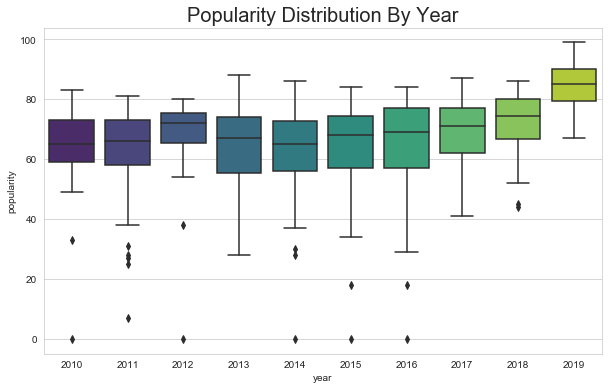

In [13]:
plt.figure(figsize=(10,6))
plt.title('Popularity Distribution By Year', fontsize=20)
plt.xlabel('year', fontsize=10)
plt.ylabel('popularity', fontsize=10)
sns.boxplot(x = 'year', y = 'popularity', data = top_songs, palette = 'viridis')

### Songs from recent years tend to have higher popularity values

In [14]:
featured = top_songs[top_songs['title'].apply(lambda x: str(x).rfind('feat.') != -1)]['title'].count()
display(Markdown("### {} of the top songs this decade featured another artist".format(featured)))

### 81 of the top songs this decade featured another artist

### Which artists and genres were more popular this decade? 

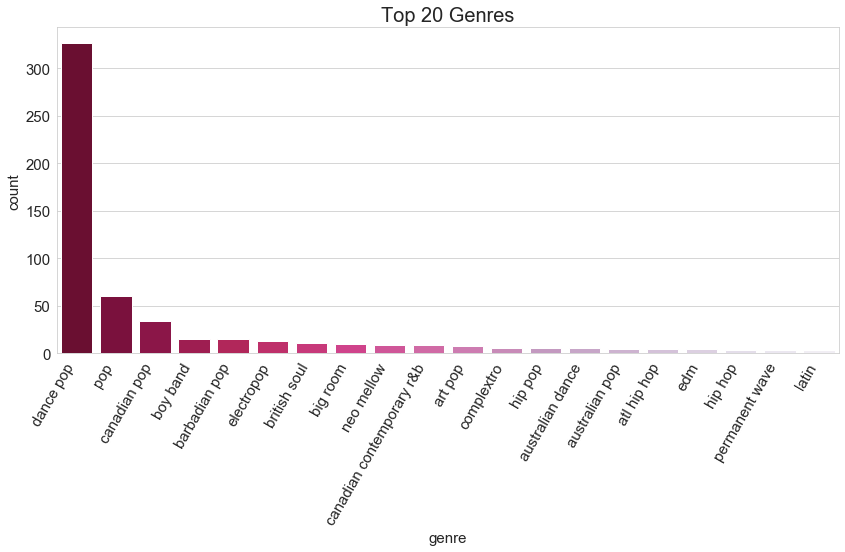

In [15]:
plt.figure(figsize=(14,6))
plt.title('Top 20 Genres',fontsize=20)
plt.xlabel('Genre', fontsize=15)
plt.ylabel('Count', fontsize=15)

sns.countplot(top_songs['genre'],order=pd.value_counts(top_songs['genre']).iloc[:20].index,
              palette=sns.color_palette("PuRd_r", 20))

plt.xticks(size=15,rotation=60, horizontalalignment = 'right')
plt.yticks(size=15)
plt.show()

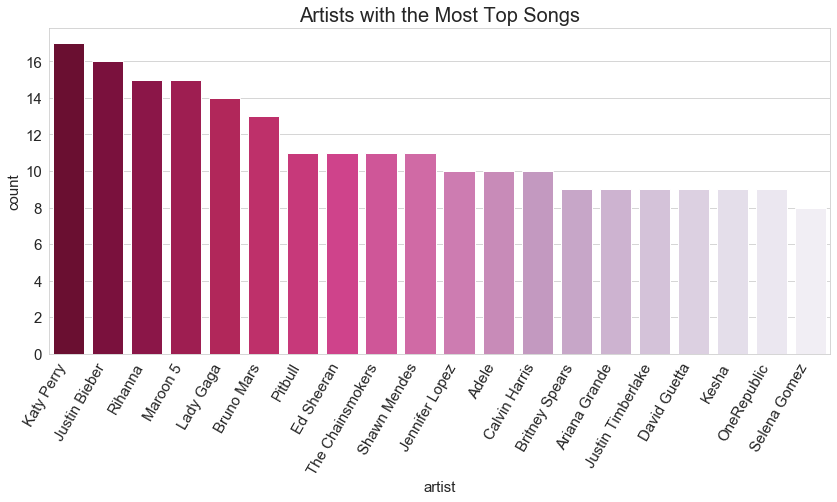

In [16]:
plt.figure(figsize=(14,6))
plt.title('Artists with the Most Top Songs',fontsize=20)
plt.xlabel('Artist', fontsize=15)
plt.ylabel('Count', fontsize=15)

sns.countplot(top_songs['artist'],order=pd.value_counts(top_songs['artist']).iloc[:20].index,
              palette=sns.color_palette("PuRd_r", 20))

plt.xticks(size=15,rotation=60, horizontalalignment = 'right')
plt.yticks(size=15)
plt.show()